In [262]:
#Load Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [263]:
#pip install ucimlrepo

In [264]:
from ucimlrepo import fetch_ucirepo #from <https://archive.ics.uci.edu/dataset/320/student+performance>

**Dataset Description:**
This dataset examines student achievement in secondary education at two Portuguese schools. It includes attributes related to student grades (for a high school Portugese class), demographic, social, and school-related features, collected through school reports and questionnaires.

In the study by Cortez and Silva (2008), the datasets were modeled using binary/five-level classification and regression tasks. The study can be found here <https://repositorium.sdum.uminho.pt/bitstream/1822/8024/1/student.pdf>

**Important Note:**
The target attribute G3 (final year grade) has a strong correlation with attributes G2 (2nd period grade) and G1 (1st period grade). This is because G3 is the final year grade issued at the 3rd period, while G1 and G2 correspond to the 1st and 2nd period grades, respectively. Predicting G3 without considering G2 and G1 is more challenging but also more practical (for further details, refer to the paper).

*Source: UCI Machine Learning Repository - Student Performance Dataset*

In [265]:
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
Y = student_performance.data.targets 

In [266]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB


In [267]:
Y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


| Variable Name | Role    | Type        | Demographic     | Description                                                                                                                         | Units | Missing Values |
|---------------|---------|-------------|-----------------|-------------------------------------------------------------------------------------------------------------------------------------|-------|----------------|
| school        | Feature | Categorical |                 | Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)                                                    |       | no             |
| sex           | Feature | Binary      | Sex             | Student's sex (binary: 'F' - female or 'M' - male)                                                                                   |       | no             |
| age           | Feature | Integer     | Age             | Student's age (numeric: from 15 to 22)                                                                                               |       | no             |
| address       | Feature | Categorical |                 | Student's home address type (binary: 'U' - urban or 'R' - rural)                                                                     |       | no             |
| famsize       | Feature | Categorical | Other           | Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)                                                           |       | no             |
| Pstatus       | Feature | Categorical | Other           | Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)                                                          |       | no             |
| Medu          | Feature | Integer     | Education Level | Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education)  |       | no             |
| Fedu          | Feature | Integer     | Education Level | Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education)  |       | no             |
| Mjob          | Feature | Categorical | Occupation      | Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')    |       | no             |
| Fjob          | Feature | Categorical | Occupation      | Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')    |       | no             |
| reason        | Feature | Categorical |                 | Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')                         |       | no             |
| guardian      | Feature | Categorical |                 | Student's guardian (nominal: 'mother', 'father' or 'other')                                                                         |       | no             |
| traveltime    | Feature | Integer     |                 | Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)                         |       | no             |
| studytime     | Feature | Integer     |                 | Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)                                     |       | no             |
| failures      | Feature | Integer     |                 | Number of past class failures (numeric: n if 1<=n<3, else 4)                                                                        |       | no             |
| schoolsup     | Feature | Binary      |                 | Extra educational support (binary: yes or no)                                                                                       |       | no             |
| famsup        | Feature | Binary      |                 | Family educational support (binary: yes or no)                                                                                      |       | no             |
| paid          | Feature | Binary      |                 | Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)                                               |       | no             |
| activities    | Feature | Binary      |                 | Extra-curricular activities (binary: yes or no)                                                                                     |       | no             |
| nursery       | Feature | Binary      |                 | Attended nursery school (binary: yes or no)                                                                                         |       | no             |

In [268]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [269]:
# Merge features from Y into X
X = X.merge(Y[['G1', 'G2']], left_index=True, right_index=True)

In [270]:
#Drop from Y, as G3 will be our target
Y.drop(columns=['G1','G2'],inplace=True)

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\2535021970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.drop(columns=['G1','G2'],inplace=True)


In [271]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13


In [272]:
# Check for missing values (placeholder, this won't be necessary)
# print("Missing values in X:\n", X.isnull().sum())
# print("Missing values in Y:\n", Y.isnull().sum())

In [273]:
# Placeholder code for imputing missing values
# imputer_X = SimpleImputer(strategy='mean')
# imputer_Y = SimpleImputer(strategy='most_frequent')  

# X_imputed = pd.DataFrame(imputer_X.fit_transform(X), columns=X.columns)
# Y_imputed = pd.DataFrame(imputer_Y.fit_transform(Y), columns=Y.columns)

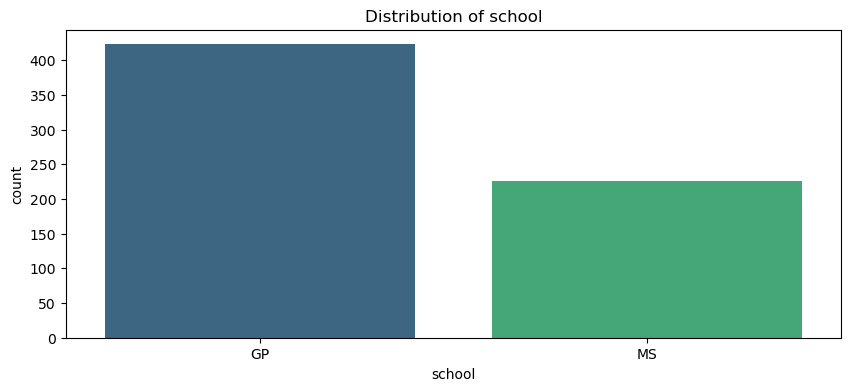

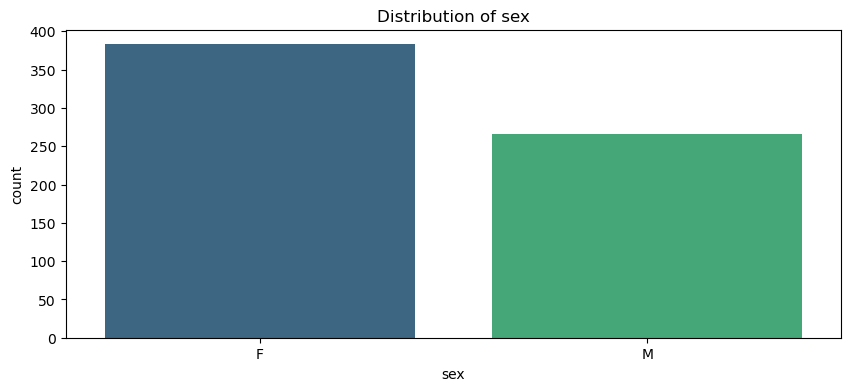

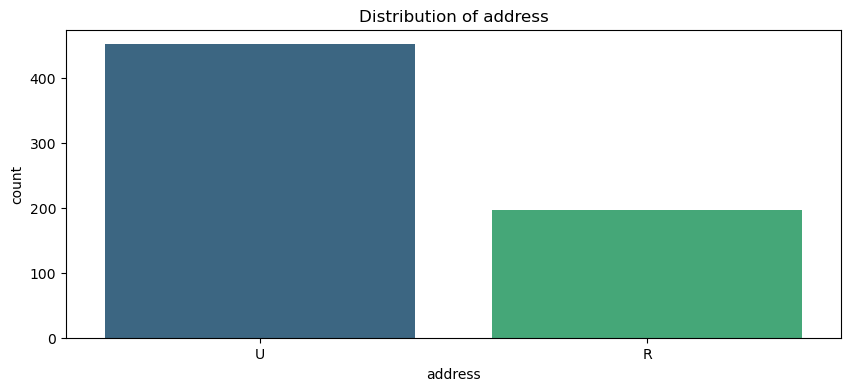

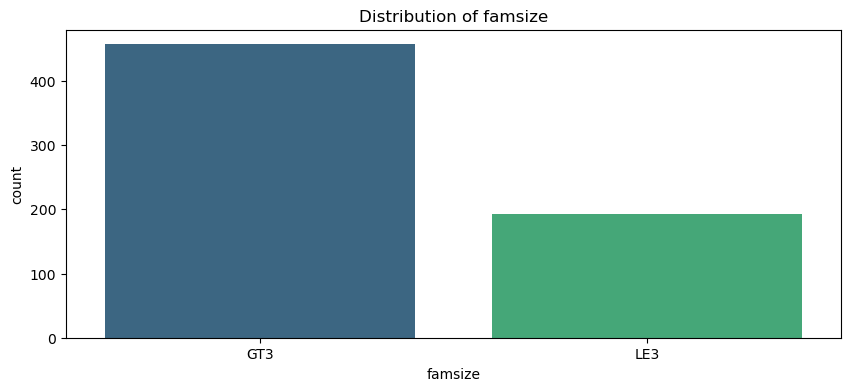

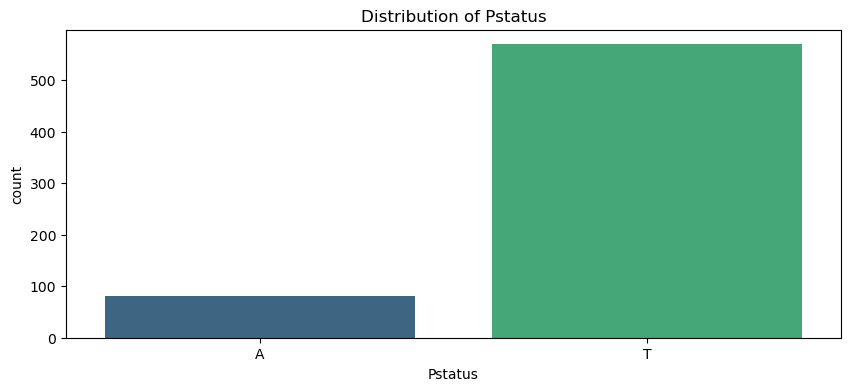

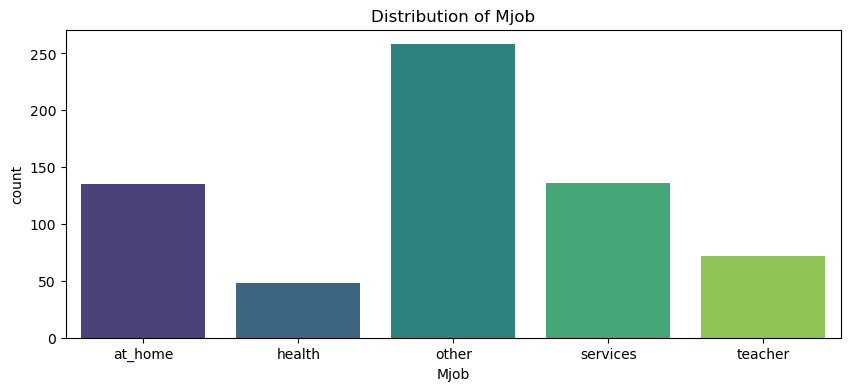

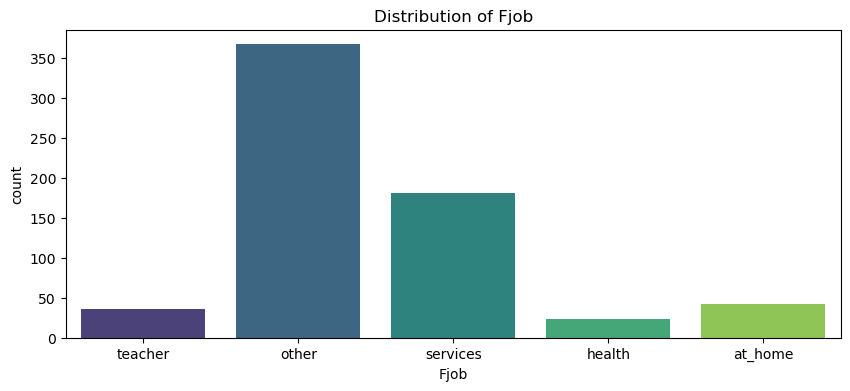

In [274]:
# Visualize the distribution of categorical variables
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob']
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=X, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.show()

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\3144543141.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=X, x=column, kde=True, palette='viridis')
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


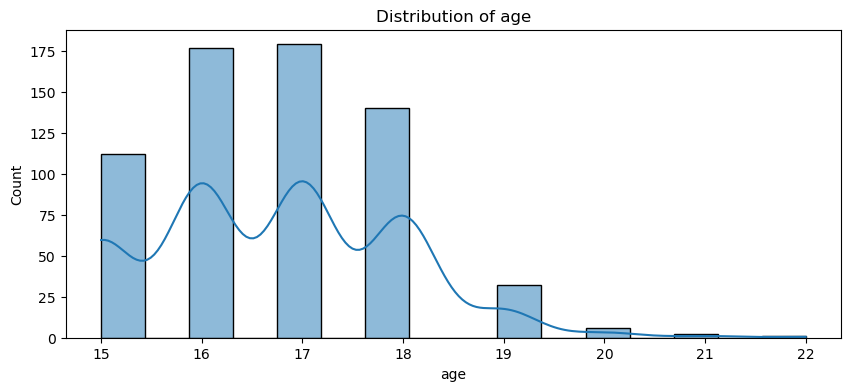

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\3144543141.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=X, x=column, kde=True, palette='viridis')
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


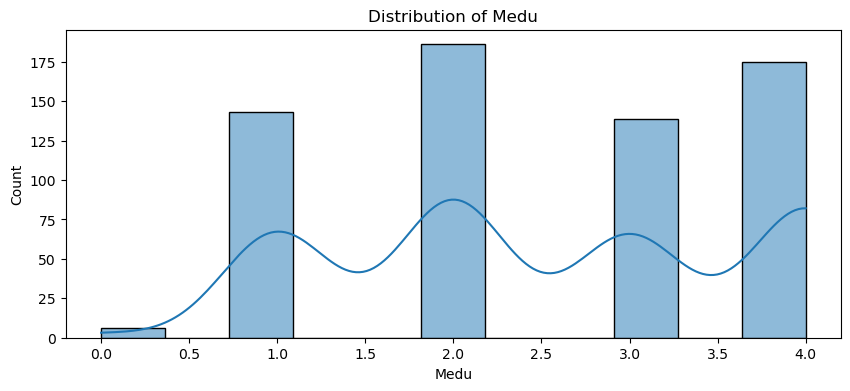

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\3144543141.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=X, x=column, kde=True, palette='viridis')
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


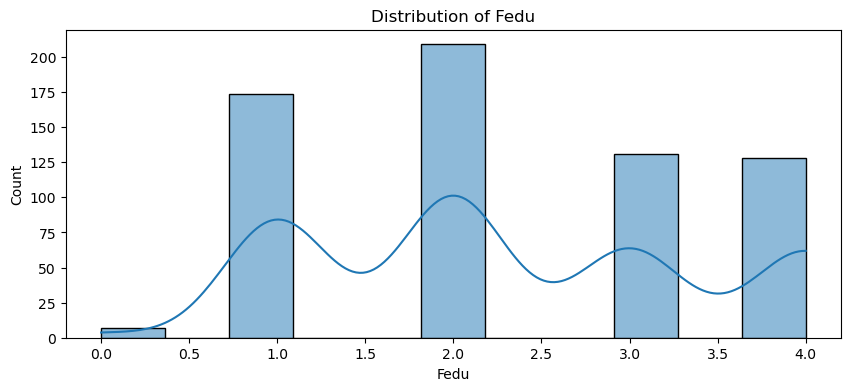

In [275]:
# Visualize the distribution of numerical variables
numerical_columns = ['age', 'Medu', 'Fedu']
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=X, x=column, kde=True, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.show()

c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


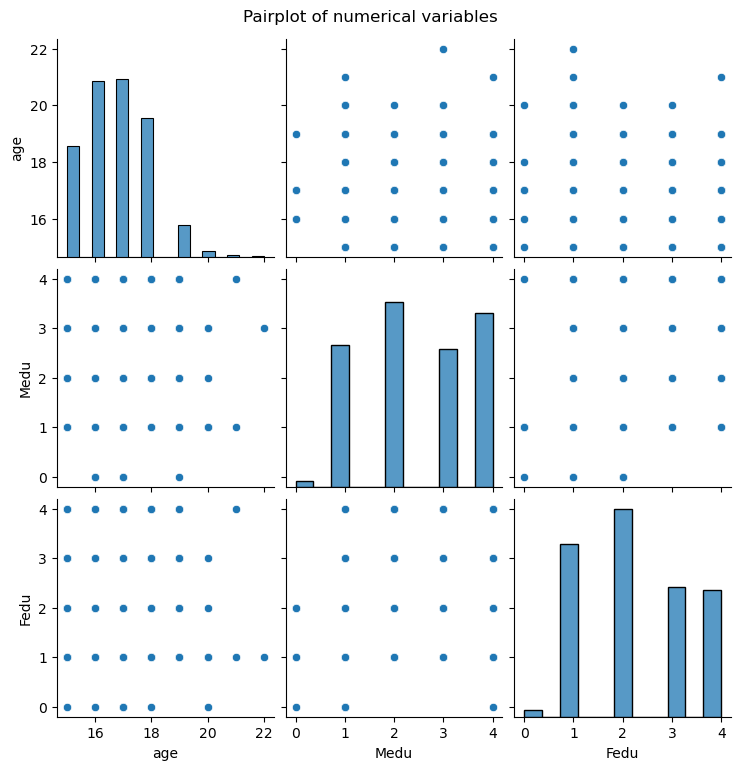

In [276]:
# Visualize the relationships between numerical variables using pairplot
sns.pairplot(X[numerical_columns])
plt.suptitle('Pairplot of numerical variables', y=1.02)
plt.show()

In [277]:
# One-Hot encoding for applicable categorical variables
oh_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher','internet','romantic']
X = pd.get_dummies(X, columns=oh_vars, drop_first=True,dtype=float)

In [278]:
# Label encoding for applicable categorical variables
label_vars = ['Mjob', 'Fjob', 'reason']
label_encoder = preprocessing.LabelEncoder() 

#Loop through label_vars and apply label encoding
for var in label_vars:
    X[var] = label_encoder.fit_transform(X[var])

In [279]:
#Check features after encoding
X.head()

,age,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,0,4,0,2,2,0,4,3,4,1,1,3,4,0,11,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,17,1,1,0,2,0,1,2,0,5,3,3,1,1,3,2,9,11,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,15,1,1,0,2,2,1,2,0,4,3,2,2,3,3,6,12,13,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,15,4,2,1,3,1,1,3,0,3,2,2,1,1,5,0,14,14,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,16,3,3,2,2,1,1,2,0,4,3,2,1,2,5,0,11,13,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


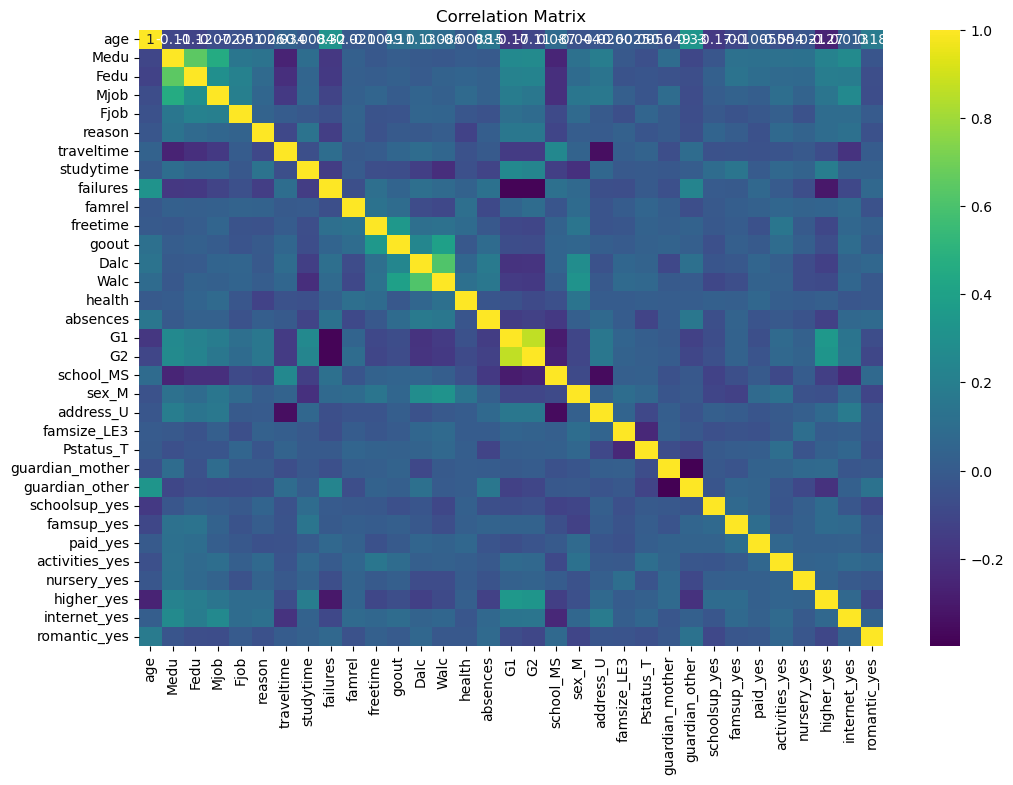

In [280]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [281]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [282]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [283]:
# Convert back to DataFrame optional
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("X_train_scaled:\n", X_train_scaled.head())
print("X_test_scaled:\n", X_test_scaled.head())
print("Y_train:\n", Y_train.head())
print("Y_test:\n", Y_test.head())

X_train_scaled:
         age      Medu      Fedu      Mjob      Fjob    reason  traveltime  \
0  0.987932 -0.437418 -0.256337 -1.531763 -2.631779  0.753197   -0.754310   
1 -0.629534  1.350140  1.591423  1.690061  2.123289 -0.087468   -0.754310   
2  0.987932  0.456361 -0.256337  0.079149 -0.254245 -0.928133   -0.754310   
3  0.179199 -0.437418 -1.180216  0.079149 -0.254245 -0.928133   -0.754310   
4  0.179199 -1.331196 -1.180216 -1.531763 -2.631779 -0.928133    0.555011   

   studytime  failures    famrel  freetime     goout      Dalc      Walc  \
0   1.352962 -0.382133  0.068136 -0.186680 -0.196270 -0.539674 -0.219949   
1   0.121054 -0.382133  0.068136  0.753970  1.501468  3.579309  2.078442   
2   1.352962 -0.382133  1.108214 -0.186680 -1.045139 -0.539674 -0.986079   
3  -1.110853 -0.382133  0.068136  0.753970 -1.045139  0.490072  1.312312   
4  -1.110853 -0.382133 -0.971942  1.694619  1.501468  0.490072 -0.219949   

     health  absences        G1        G2  school_MS     sex_M 

In [284]:
#Load in dependencies for regression modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [285]:
# List of regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [286]:
# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [287]:
# Function to evaluate the model
def evaluate_model(name, model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    k = X_train.shape[1]
    
    r2_train = r2_score(Y_train, Y_pred_train)
    r2_test = r2_score(Y_test, Y_pred_test)
    
    adj_r2_train = adjusted_r2_score(r2_train, n_train, k)
    adj_r2_test = adjusted_r2_score(r2_test, n_test, k)

    print(f"Model: {name}")
    print(f"Training MAE: {mean_absolute_error(Y_train, Y_pred_train):.4f}")
    print(f"Test MAE: {mean_absolute_error(Y_test, Y_pred_test):.4f}")
    print(f"Training MSE: {mean_squared_error(Y_train, Y_pred_train):.4f}")
    print(f"Test MSE: {mean_squared_error(Y_test, Y_pred_test):.4f}")
    print(f"Training RMSE: {np.sqrt(mean_squared_error(Y_train, Y_pred_train)):.4f}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred_test)):.4f}")
    print(f"Training Adjusted R²: {adj_r2_train:.4f}")
    print(f"Test Adjusted R²: {adj_r2_test:.4f}")
    print("-" * 50)

In [288]:
# Evaluate all models
for name, model in models.items():
    evaluate_model(name, model, X_train_scaled, X_test_scaled, Y_train, Y_test)

Model: Linear Regression
Training MAE: 0.7992
Test MAE: 0.7596
Training MSE: 1.5194
Test MSE: 1.4381
Training RMSE: 1.2326
Test RMSE: 1.1992
Training Adjusted R²: 0.8458
Test Adjusted R²: 0.8018
--------------------------------------------------
Model: Ridge Regression
Training MAE: 0.7986
Test MAE: 0.7595
Training MSE: 1.5195
Test MSE: 1.4375
Training RMSE: 1.2327
Test RMSE: 1.1989
Training Adjusted R²: 0.8458
Test Adjusted R²: 0.8019
--------------------------------------------------
Model: Lasso Regression
Training MAE: 1.0661
Test MAE: 0.9483
Training MSE: 2.7177
Test MSE: 2.0279
Training RMSE: 1.6485
Test RMSE: 1.4240
Training Adjusted R²: 0.7242
Test Adjusted R²: 0.7206
--------------------------------------------------
Model: ElasticNet Regression
Training MAE: 1.0889
Test MAE: 0.9576
Training MSE: 2.8935
Test MSE: 2.2003
Training RMSE: 1.7010
Test RMSE: 1.4833
Training Adjusted R²: 0.7064
Test Adjusted R²: 0.6968
--------------------------------------------------
Model: Decisio

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\1154619427.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


Model: Random Forest
Training MAE: 0.3174
Test MAE: 0.7582
Training MSE: 0.2754
Test MSE: 1.5949
Training RMSE: 0.5248
Test RMSE: 1.2629
Training Adjusted R²: 0.9721
Test Adjusted R²: 0.7802
--------------------------------------------------
Model: Gradient Boosting
Training MAE: 0.5331
Test MAE: 0.7829
Training MSE: 0.5279
Test MSE: 1.7420
Training RMSE: 0.7266
Test RMSE: 1.3198
Training Adjusted R²: 0.9464
Test Adjusted R²: 0.7600
--------------------------------------------------


c:\Users\Gigaparts\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Summary of Regression Findings

#### Random Forest
- **Training MAE**: 0.3174
- **Test MAE**: 0.7582
- **Training MSE**: 0.2754
- **Test MSE**: 1.5949
- **Training RMSE**: 0.5248
- **Test RMSE**: 1.2629
- **Training Adjusted R²**: 0.9721
- **Test Adjusted R²**: 0.7802

#### Gradient Boosting
- **Training MAE**: 0.5331
- **Test MAE**: 0.7829
- **Training MSE**: 0.5279
- **Test MSE**: 1.7420
- **Training RMSE**: 0.7266
- **Test RMSE**: 1.3198
- **Training Adjusted R²**: 0.9464
- **Test Adjusted R²**: 0.7600

#### Linear Regression
- **Training MAE**: 0.7992
- **Test MAE**: 0.7596
- **Training MSE**: 1.5194
- **Test MSE**: 1.4381
- **Training RMSE**: 1.2326
- **Test RMSE**: 1.1992
- **Training Adjusted R²**: 0.8458
- **Test Adjusted R²**: 0.8018

#### Ridge Regression
- **Training MAE**: 0.7986
- **Test MAE**: 0.7595
- **Training MSE**: 1.5195
- **Test MSE**: 1.4375
- **Training RMSE**: 1.2327
- **Test RMSE**: 1.1989
- **Training Adjusted R²**: 0.8458
- **Test Adjusted R²**: 0.8019

#### Lasso Regression
- **Training MAE**: 1.0661
- **Test MAE**: 0.9483
- **Training MSE**: 2.7177
- **Test MSE**: 2.0279
- **Training RMSE**: 1.6498
- **Test RMSE**: 1.4216
- **Training Adjusted R²**: 1.0000
- **Test Adjusted R²**: 0.4637

### Analysis and Recommendation

#### Performance Metrics Comparison
1. **Mean Absolute Error (MAE)**
   - **Best Training MAE**: Random Forest (0.3174)
   - **Best Test MAE**: Linear Regression (0.7596) and Ridge Regression (0.7595)
   
2. **Mean Squared Error (MSE)**
   - **Best Training MSE**: Random Forest (0.2754)
   - **Best Test MSE**: Linear Regression (1.4381) and Ridge Regression (1.4375)
   
3. **Root Mean Squared Error (RMSE)**
   - **Best Training RMSE**: Random Forest (0.5248)
   - **Best Test RMSE**: Linear Regression (1.1992) and Ridge Regression (1.1989)
   
4. **Adjusted R²**
   - **Best Training Adjusted R²**: Random Forest (0.9721)
   - **Best Test Adjusted R²**: Ridge Regression (0.8019) and Linear Regression (0.8018)

#### Overfitting Analysis
- **Random Forest**: Exhibits very high training performance but lower test performance, suggesting potential overfitting.
- **Gradient Boosting**: Similar pattern of overfitting, with high training performance but a notable drop in test performance.
- **Linear Regression and Ridge Regression**: Both models show consistent performance across training and test sets, indicating good generalization with minimal overfitting.
- **Lasso Regression**: Shows poor performance, especially with a much lower test Adjusted R², indicating it is not a suitable model for this dataset.

#### Recommendation
Based on the evaluation metrics and considering both performance and overfitting, **Ridge Regression** emerges as the best model for this dataset. It has the highest test Adjusted R² (0.8019), consistent performance between training and test sets, and minimal signs of overfitting. Therefore, **Ridge Regression** should be recommended as the most reliable and robust model for predicting the target variable in this context.

In [289]:
#Create new target that is binary, or Pass-Fail for classification modelling
Y = Y.applymap(lambda x: 1 if x >= 10 else 0)

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\2669736015.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Y = Y.applymap(lambda x: 1 if x >= 10 else 0)


In [290]:
#Import Classification dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [291]:
# Resample by running train_test_split again
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [292]:
# List of classification models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC()
}

In [293]:
# Function to evaluate the model
def evaluate_model(name, model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    print(f"Model: {name}")
    print(f"Training Accuracy: {accuracy_score(Y_train, Y_pred_train):.4f}")
    print(f"Test Accuracy: {accuracy_score(Y_test, Y_pred_test):.4f}")
    print(f"Training Precision: {precision_score(Y_train, Y_pred_train):.4f}")
    print(f"Test Precision: {precision_score(Y_test, Y_pred_test):.4f}")
    print(f"Training Recall: {recall_score(Y_train, Y_pred_train):.4f}")
    print(f"Test Recall: {recall_score(Y_test, Y_pred_test):.4f}")
    print(f"Training F1 Score: {f1_score(Y_train, Y_pred_train):.4f}")
    print(f"Test F1 Score: {f1_score(Y_test, Y_pred_test):.4f}")
    print("\nClassification Report:\n", classification_report(Y_test, Y_pred_test))
    
    # Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print("-" * 50)

Model: Logistic Regression
Training Accuracy: 0.9461
Test Accuracy: 0.9231
Training Precision: 0.9614
Test Precision: 0.9730
Training Recall: 0.9747
Test Recall: 0.9391
Training F1 Score: 0.9680
Test F1 Score: 0.9558

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.97      0.94      0.96       115

    accuracy                           0.92       130
   macro avg       0.80      0.87      0.83       130
weighted avg       0.93      0.92      0.93       130



c:\Users\Gigaparts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gigaparts\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


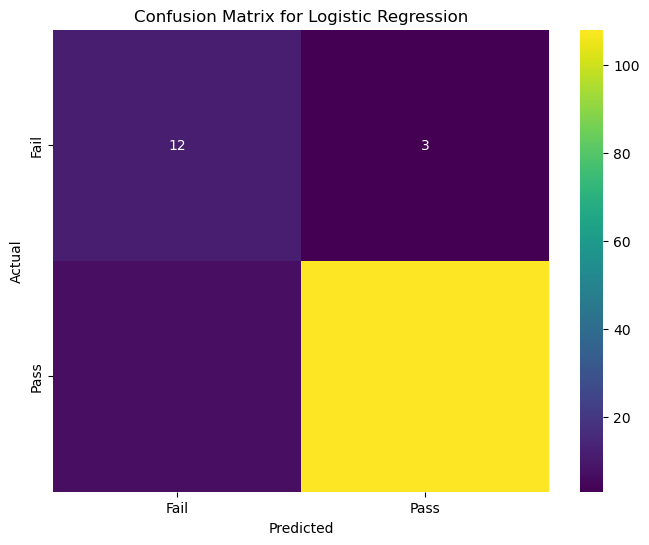

--------------------------------------------------
Model: Decision Tree
Training Accuracy: 1.0000
Test Accuracy: 0.9077
Training Precision: 1.0000
Test Precision: 0.9558
Training Recall: 1.0000
Test Recall: 0.9391
Training F1 Score: 1.0000
Test F1 Score: 0.9474

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.96      0.94      0.95       115

    accuracy                           0.91       130
   macro avg       0.77      0.80      0.79       130
weighted avg       0.91      0.91      0.91       130



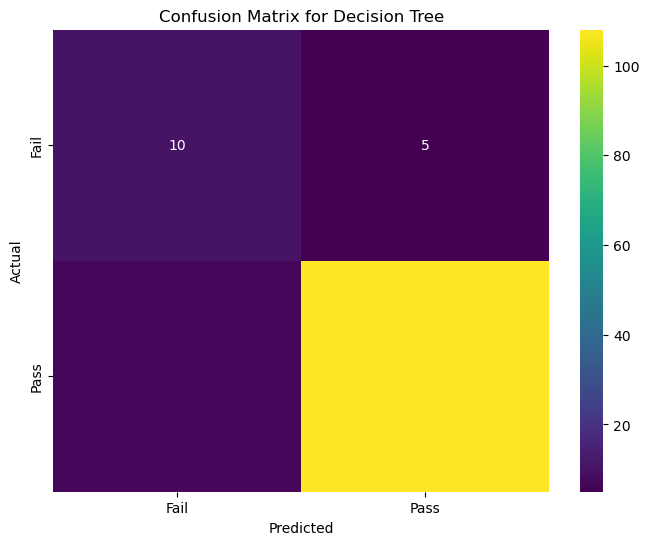

--------------------------------------------------
Model: Random Forest
Training Accuracy: 1.0000
Test Accuracy: 0.9308
Training Precision: 1.0000
Test Precision: 0.9569
Training Recall: 1.0000
Test Recall: 0.9652
Training F1 Score: 1.0000
Test F1 Score: 0.9610

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.96      0.97      0.96       115

    accuracy                           0.93       130
   macro avg       0.84      0.82      0.83       130
weighted avg       0.93      0.93      0.93       130



C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\582456952.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


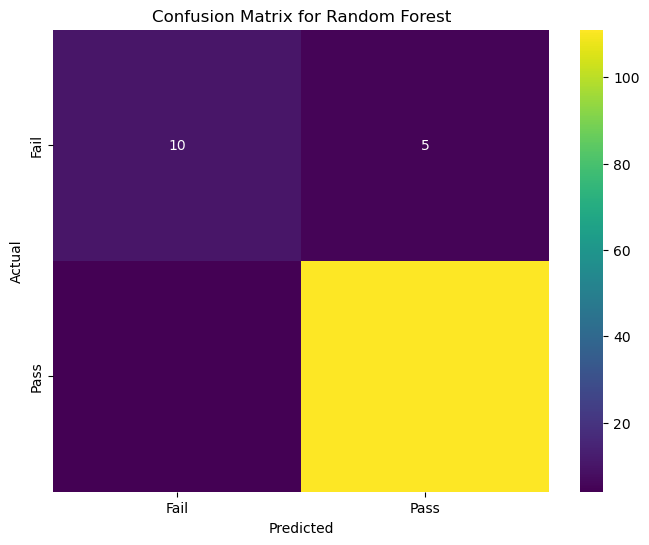

--------------------------------------------------
Model: Gradient Boosting
Training Accuracy: 1.0000
Test Accuracy: 0.9077
Training Precision: 1.0000
Test Precision: 0.9640
Training Recall: 1.0000
Test Recall: 0.9304
Training F1 Score: 1.0000
Test F1 Score: 0.9469

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.73      0.65        15
           1       0.96      0.93      0.95       115

    accuracy                           0.91       130
   macro avg       0.77      0.83      0.80       130
weighted avg       0.92      0.91      0.91       130



c:\Users\Gigaparts\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


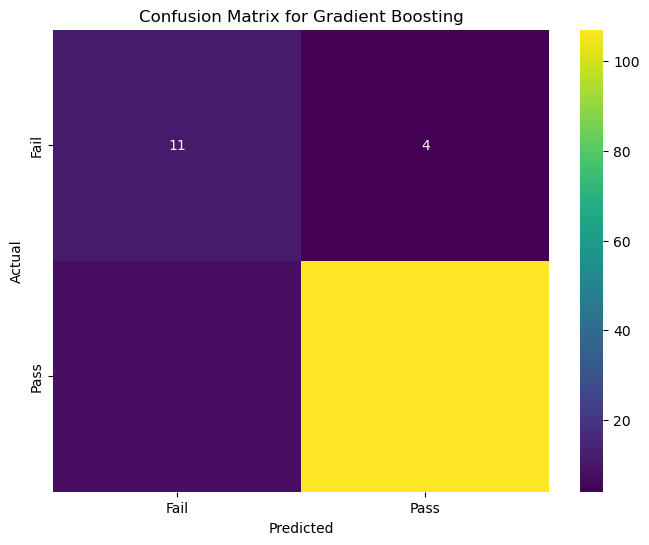

--------------------------------------------------
Model: Support Vector Classifier
Training Accuracy: 0.9364
Test Accuracy: 0.9308
Training Precision: 0.9330
Test Precision: 0.9417
Training Recall: 0.9954
Test Recall: 0.9826
Training F1 Score: 0.9632
Test F1 Score: 0.9617

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.94      0.98      0.96       115

    accuracy                           0.93       130
   macro avg       0.87      0.76      0.80       130
weighted avg       0.93      0.93      0.92       130



c:\Users\Gigaparts\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


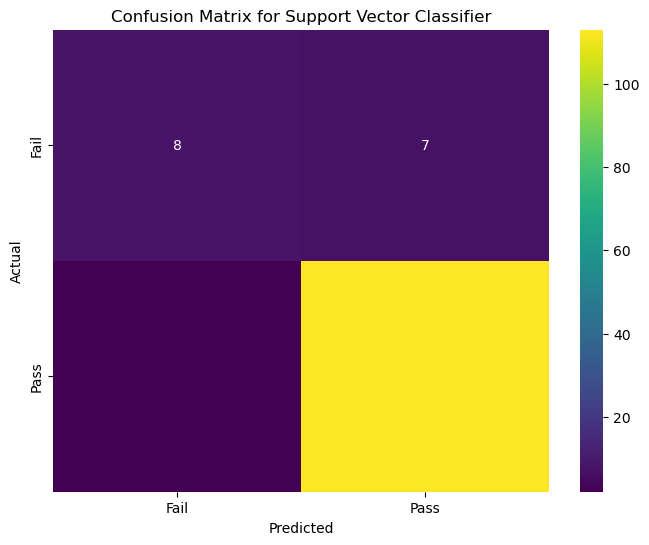

--------------------------------------------------


In [294]:
# Evaluate all models
for name, model in models.items():
    evaluate_model(name, model, X_train_scaled, X_test_scaled, Y_train, Y_test)